# 7. Job scheduling

For the mean delay with the bimodal distribution, we would need to divide all results by five because the calculations are made with a mean job size of five.

## Import packages and define the plot function

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# uncomment this line if you prefer dynamic matplotlib plots
# %matplotlib notebook

# change the default figure size
pylab.rcParams['figure.figsize'] = (7, 5)
pylab.rcParams['legend.fontsize'] = 12

markers = ['x', '+', '*']

rho = linspace(0., 1., 1000, endpoint=False)

In [3]:
# manipulate dataframes
import pandas as pd

In [4]:
# folder where the output of compute.sh is stored
folder = 'data/'

## Toy example

In [5]:
def toy_example(scenario, metric, bf, job_size_distribution, mean_job_size):
    fig, axes = subplots(nrows=1, ncols=2, figsize=(14, 5))
    
    for i in range(2):
        maximum = 0.
        
        # theoretical results
        if metric == 'service-rate':
            axes[i].plot(rho, 1. / bf(rho, i),
                         label='Balanced fairness', color='C0')
        elif metric == 'delay':
            axes[i].plot(rho, mean_job_size * bf(rho, i),
                         label='Balanced fairness', color='C0')
        
        for j, timer in enumerate([5, 1, 0]):
            # read the simulation results
            result = pd.read_csv('%s%s-%s-%d-%s.csv'
                                 % (folder, scenario, job_size_distribution, timer, metric))
            
            # plot the simulation results
            axes[i].plot(result['rho'], result['performance%d' % i],
                         label='m = %d' % timer, marker=markers[j],
                         color='C%d' % (j+1), linestyle='None')
            axes[i].fill_between(result['rho'],
                                 (result['performance%d' % i] - result['interval%d' % i]),
                                 (result['performance%d' % i] + result['interval%d' % i]),
                                 color='C%d' % (j+1), alpha=.3)
            
            # remember the maximum ordinate
            maximum = max(maximum, np.max(result['performance%d' % i] + result['interval%d' % i]))

        axes[i].set_title('Pool %d (%s - %s - %s)' % (i+1, scenario, job_size_distribution, metric))
        axes[i].set_xlim(0, 1); axes[i].set_ylim(0, maximum)
        axes[i].legend(loc='best')

### Three servers (the M model)

The following formula computes performance under balanced fairness. It is recalled in Section 7.3.1.

In [6]:
def m_model(rho, i):
    return 1. / (3. * (1.-rho)) + 1. / (2. * (3. - 3. * rho + (9./16.) * rho * rho))

#### Bimodal number of exponentially-distributed phases

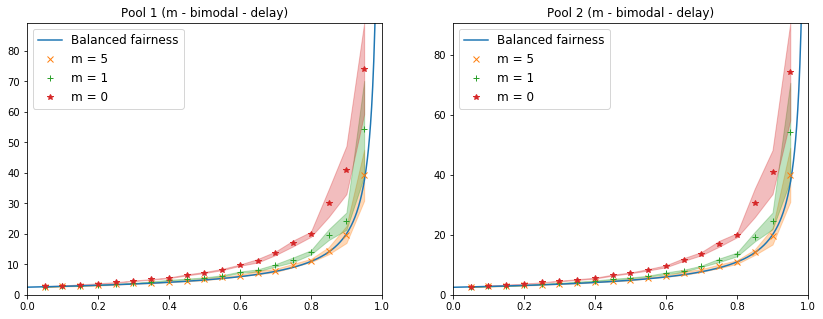

In [7]:
toy_example(scenario='m', metric='delay', bf=m_model,
            job_size_distribution='bimodal', mean_job_size=5)

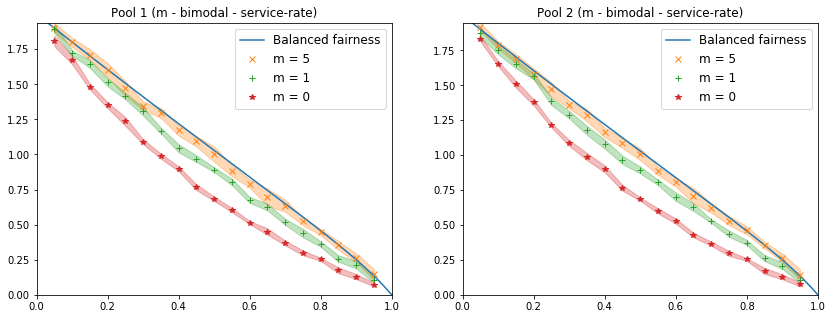

In [8]:
toy_example(scenario='m', metric='service-rate', bf=m_model,
            job_size_distribution='bimodal', mean_job_size=5)

#### Hyperexponential

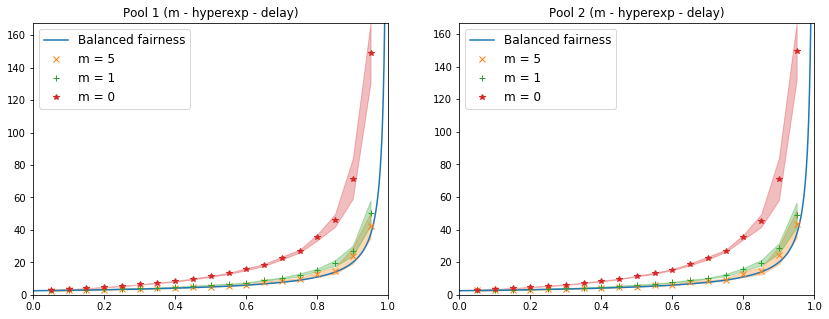

In [9]:
toy_example(scenario='m', metric='delay', bf=m_model,
            job_size_distribution='hyperexp', mean_job_size=5)

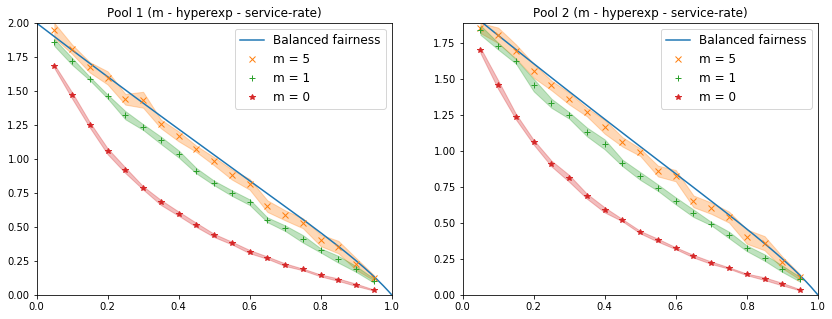

In [10]:
toy_example(scenario='m', metric='service-rate', bf=m_model,
            job_size_distribution='hyperexp', mean_job_size=5)

#### Zipf number of exponentially-distributed phases

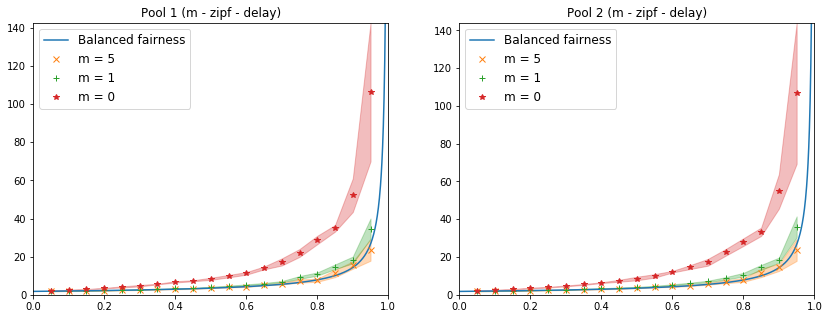

In [11]:
toy_example(scenario='m', metric='delay', bf=m_model,
            job_size_distribution='zipf', mean_job_size=3.584282)

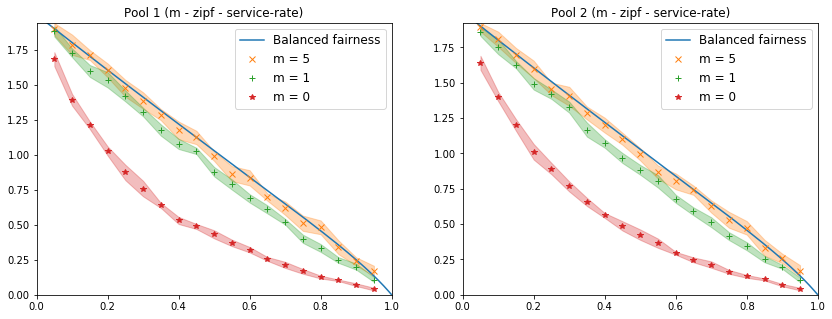

In [12]:
toy_example(scenario='m', metric='service-rate', bf=m_model,
            job_size_distribution='zipf', mean_job_size=3.584282)

### Two servers (the N model)

In [13]:
def n_model(rho, i):
    return .5 / (1 - rho) + (i == 1) * (.5 + .5 / (1. - rho)) / (2. - 2. * rho + rho * rho / 2.)

#### Bimodal number of exponentially-distributed phases

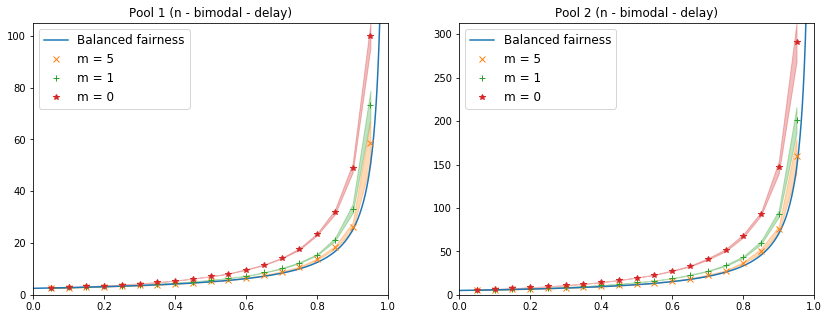

In [14]:
toy_example(scenario='n', metric='delay', bf=n_model,
            job_size_distribution='bimodal', mean_job_size=5)

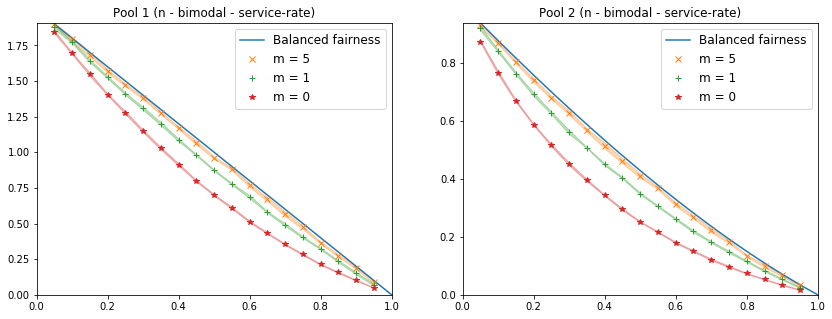

In [15]:
toy_example(scenario='n', metric='service-rate', bf=n_model,
            job_size_distribution='bimodal', mean_job_size=5)

#### Hyperexponential

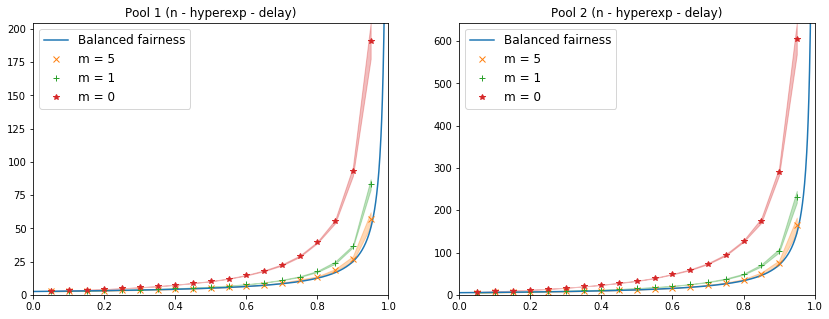

In [16]:
toy_example(scenario='n', metric='delay', bf=n_model,
            job_size_distribution='hyperexp', mean_job_size=5)

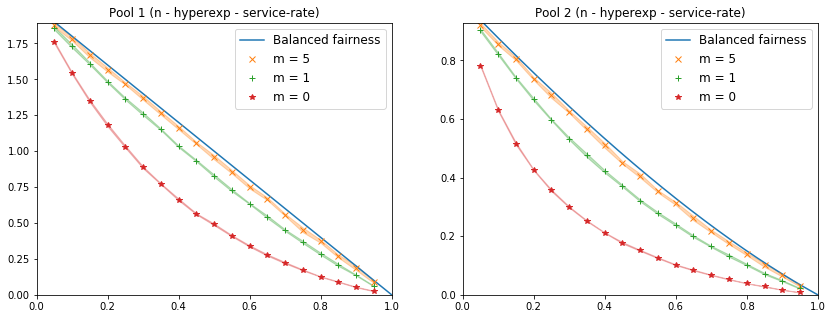

In [17]:
toy_example(scenario='n', metric='service-rate', bf=n_model,
            job_size_distribution='hyperexp', mean_job_size=5)

#### Zipf number of exponentially-distributed phases

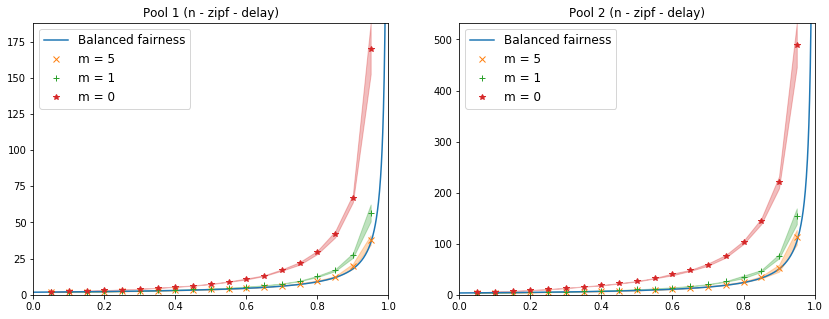

In [18]:
toy_example(scenario='n', metric='delay', bf=n_model,
            job_size_distribution='zipf', mean_job_size=3.584282)

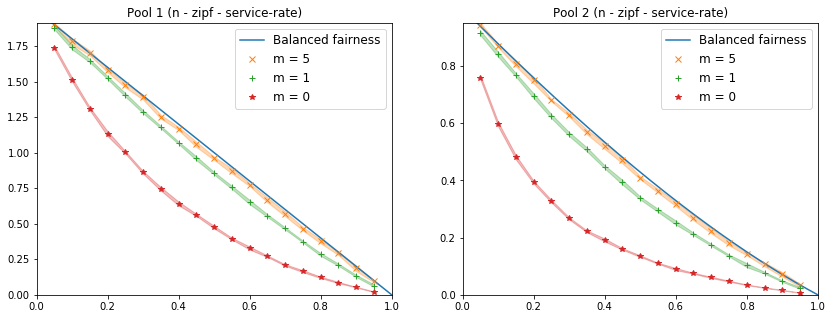

In [19]:
toy_example(scenario='n', metric='service-rate', bf=n_model,
            job_size_distribution='zipf', mean_job_size=3.584282)

## Large system with a random job assignment

In [20]:
def random(degree, metric, job_size_distribution, mean_job_size):
    figure()
    maximum = 0.
    
    # theoretical results
    #binom = ones(100 - degree + 1)
    #binom[1:] = cumprod(1. + (degree - 1.) / arange(1, 100 - degree + 1))
    #bf = sum(1. / (1. - outer(rho, binom / binom[-1])) - 1., axis=1) / (100 * rho)
    binom = ones(100 - degree + 1)
    binom[1:] = cumprod(1. + (degree - 1.) / arange(1, 100 - degree + 1))
    bf = sum(1. / ( binom[-1] / binom.reshape((1, 100-degree+1))
                   - rho.reshape((len(rho),1)) ), axis=1) / 100
    if metric == 'service-rate':
        plot(rho, 1. / bf, label='Balanced fairness', color='C0')
    elif metric == 'delay':
        plot(rho, mean_job_size * bf, label='Balanced fairness', color='C0')

    for j, timer in enumerate([5, 1, 0]):
        # read the simulation results
        result = pd.read_csv('%srandom-%d-%s-%d-%s.csv'
                             % (folder, degree, job_size_distribution, timer, metric))

        # plot the simulation results
        plot(result['rho'], result['performance'],
             label='m = %d' % timer, marker=markers[j], color='C%d' % (j+1), linestyle='None')
        fill_between(result['rho'],
                     (result['performance'] - result['interval']),
                     (result['performance'] + result['interval']),
                     color='C%d' % (j+1), alpha=.3)
            
        # remember the maximum ordinate
        maximum = max(maximum, np.max(result['performance'] + result['interval']))

    title('Average over all pools (regular-%d - %s - %s)' % (degree, job_size_distribution, metric))
    xlim(0, 1); ylim(0, maximum)
    legend(loc='best')
    show()

### Degree two

#### Bimodal number of exponentially-distributed phases

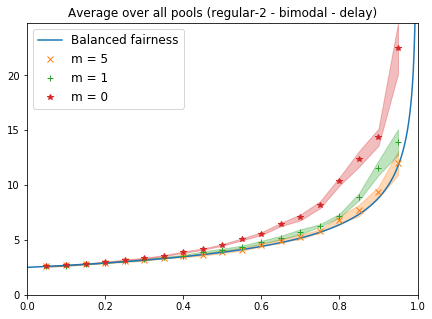

In [21]:
random(degree=2, metric='delay', job_size_distribution='bimodal', mean_job_size=5)

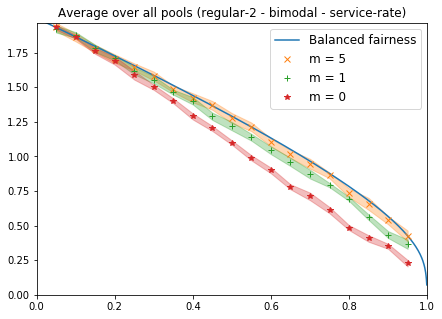

In [22]:
random(degree=2, metric='service-rate', job_size_distribution='bimodal', mean_job_size=5)

#### Hyperexponential

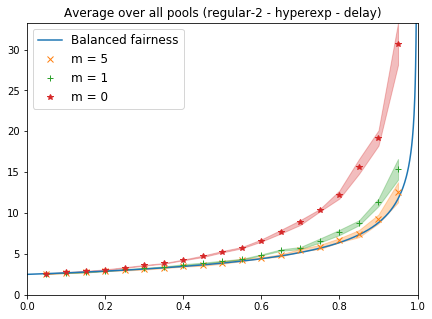

In [23]:
random(degree=2, metric='delay', job_size_distribution='hyperexp', mean_job_size=5)

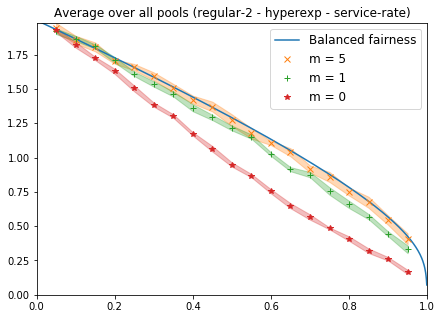

In [24]:
random(degree=2, metric='service-rate', job_size_distribution='hyperexp', mean_job_size=5)

#### Zipf number of exponentially-distributed phases

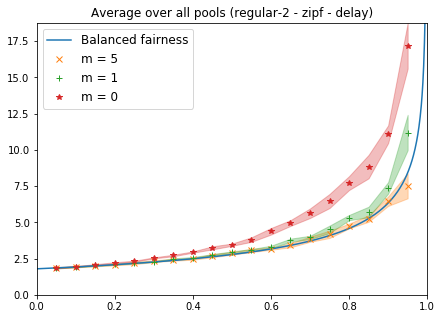

In [25]:
random(degree=2, metric='delay', job_size_distribution='zipf', mean_job_size=3.584282)

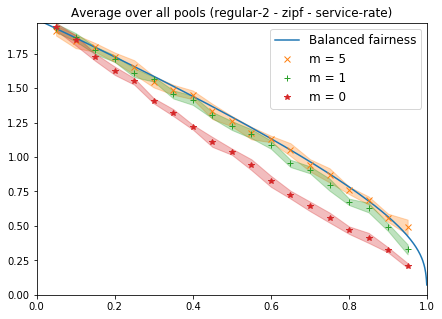

In [26]:
random(degree=2, metric='service-rate', job_size_distribution='zipf', mean_job_size=3.584282)

### Degree three

#### Bimodal number of exponentially-distributed phases

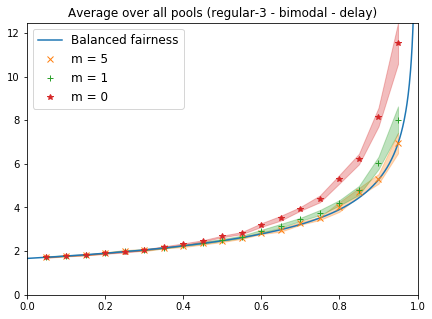

In [27]:
random(degree=3, metric='delay', job_size_distribution='bimodal', mean_job_size=5)

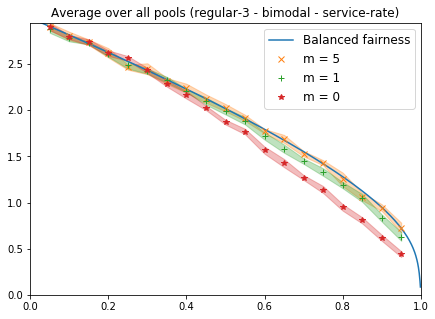

In [28]:
random(degree=3, metric='service-rate', job_size_distribution='bimodal', mean_job_size=5)

#### Hyperexponential

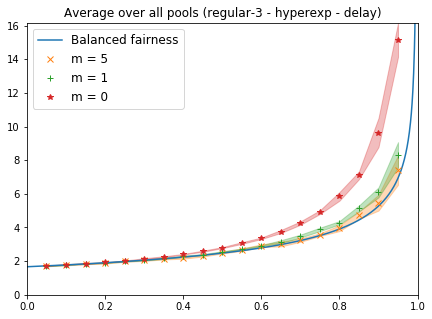

In [29]:
random(degree=3, metric='delay', job_size_distribution='hyperexp', mean_job_size=5)

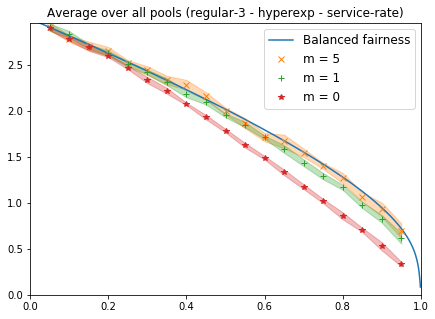

In [30]:
random(degree=3, metric='service-rate', job_size_distribution='hyperexp', mean_job_size=5)

#### Zipf number of exponentially-distributed phases

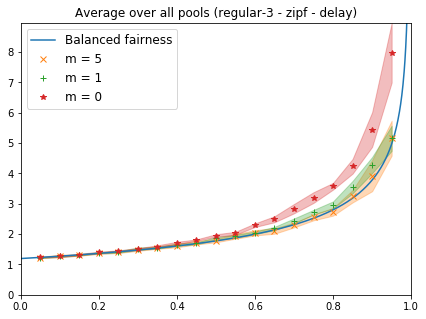

In [31]:
random(degree=3, metric='delay', job_size_distribution='zipf', mean_job_size=3.584282)

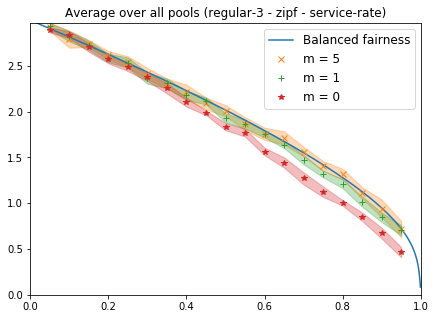

In [32]:
random(degree=3, metric='service-rate', job_size_distribution='zipf', mean_job_size=3.584282)